In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


In [3]:
# Loading the Dataset
df=pd.read_csv(r"C:\Users\ELCOT\Downloads\Copper_Set.xlsx - Result 1.csv")

# Exploring the Dataset: Basic Overview

In [4]:
df.shape

(181673, 14)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

# Converting and Engineering Features

In [4]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [8]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


# Missing Value Imputation

In [5]:
df['material_ref'].fillna('unknown', inplace=True)

In [33]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [34]:
df = df.dropna()

In [6]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.isnull().sum()

id                2
item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [8]:
df1 = df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [9]:
df1.shape

(181620, 14)

# Visualization Function, Encoding

In [10]:


def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

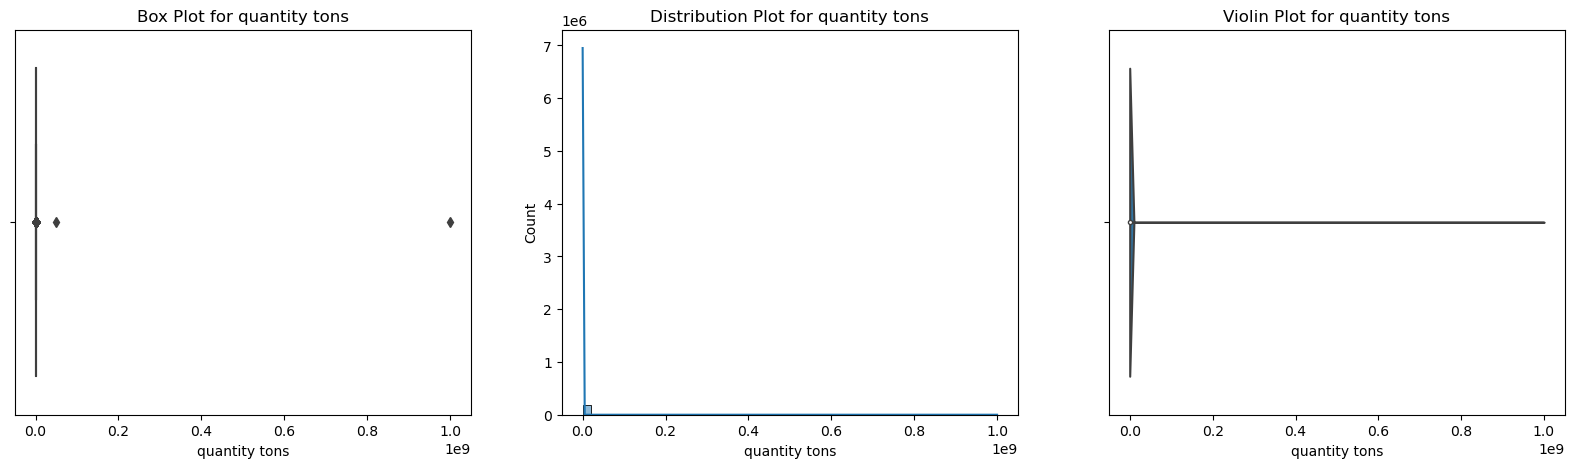

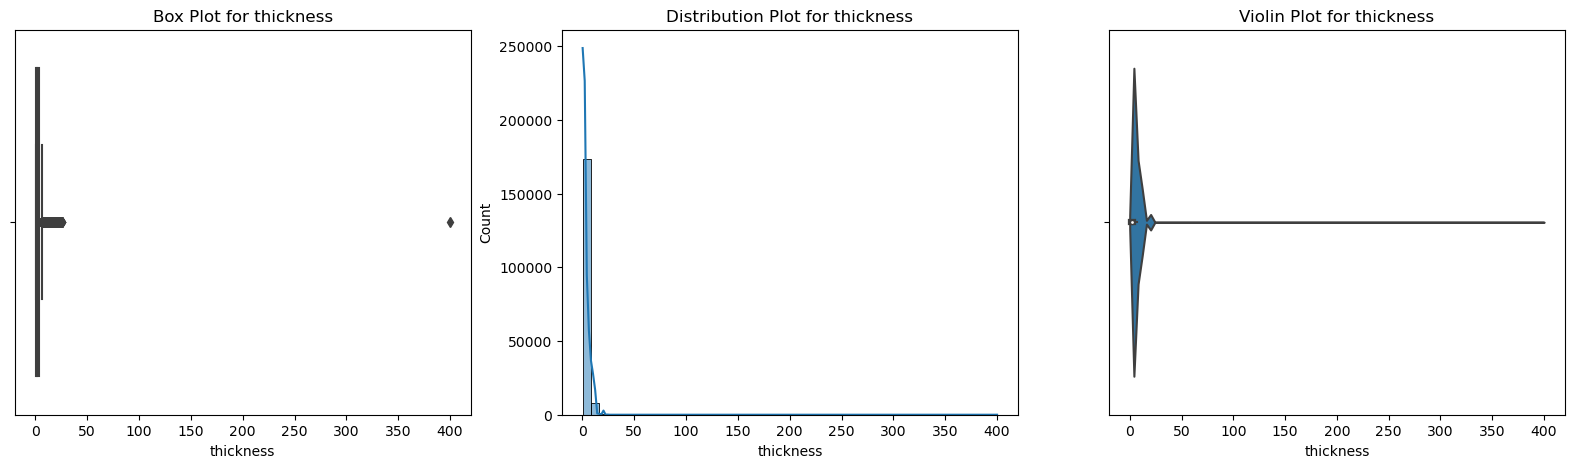

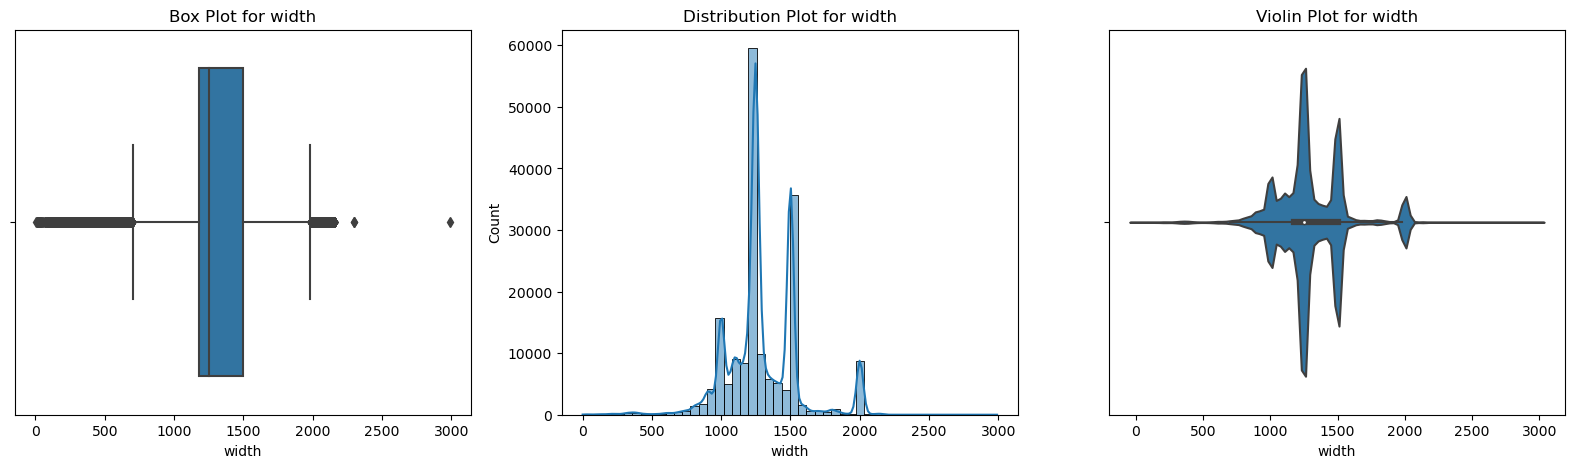

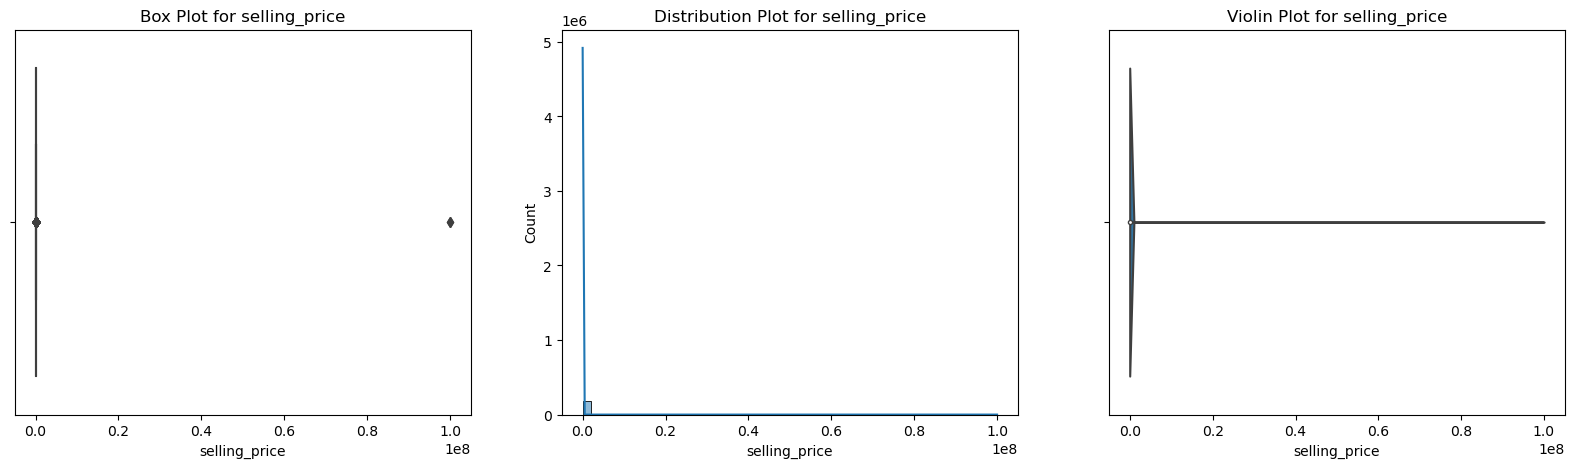

In [11]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [12]:

df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


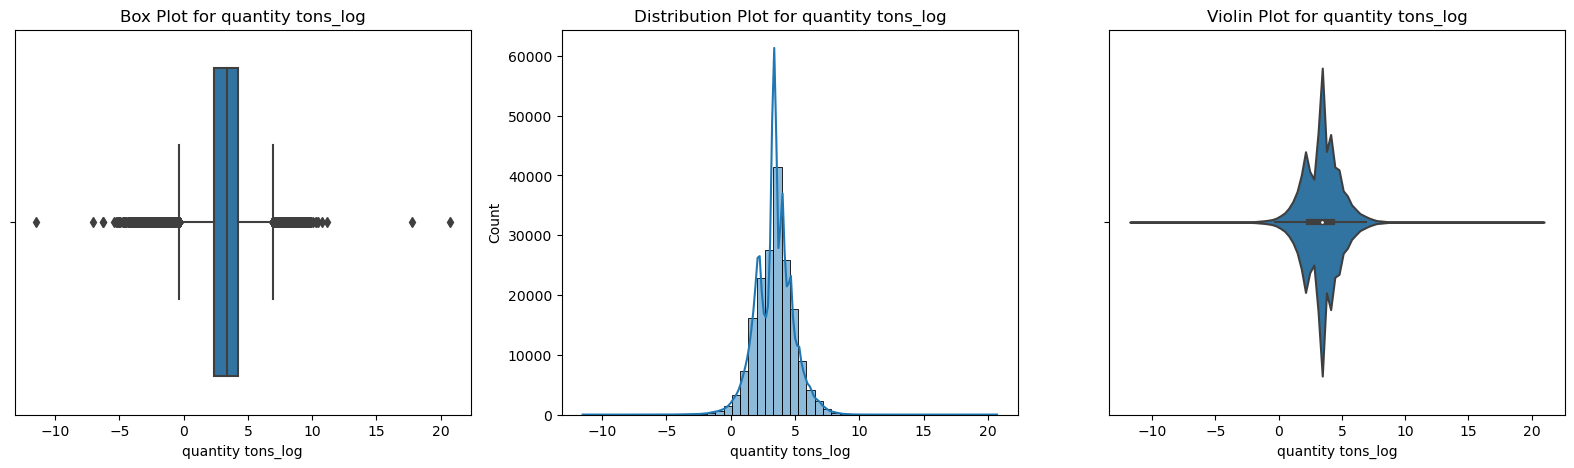

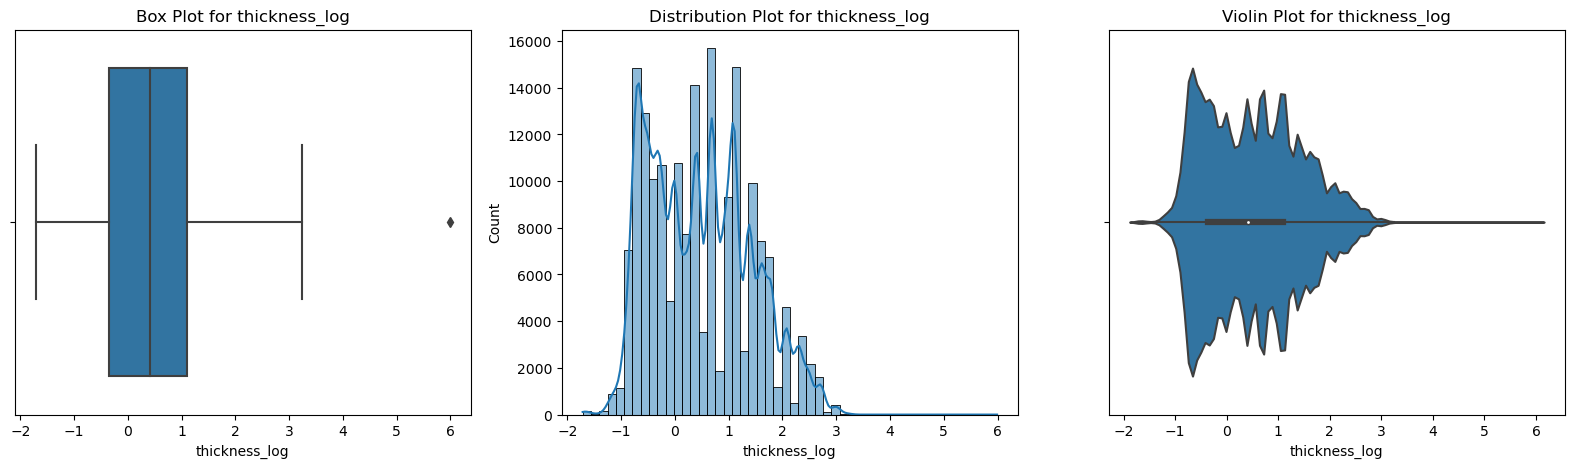

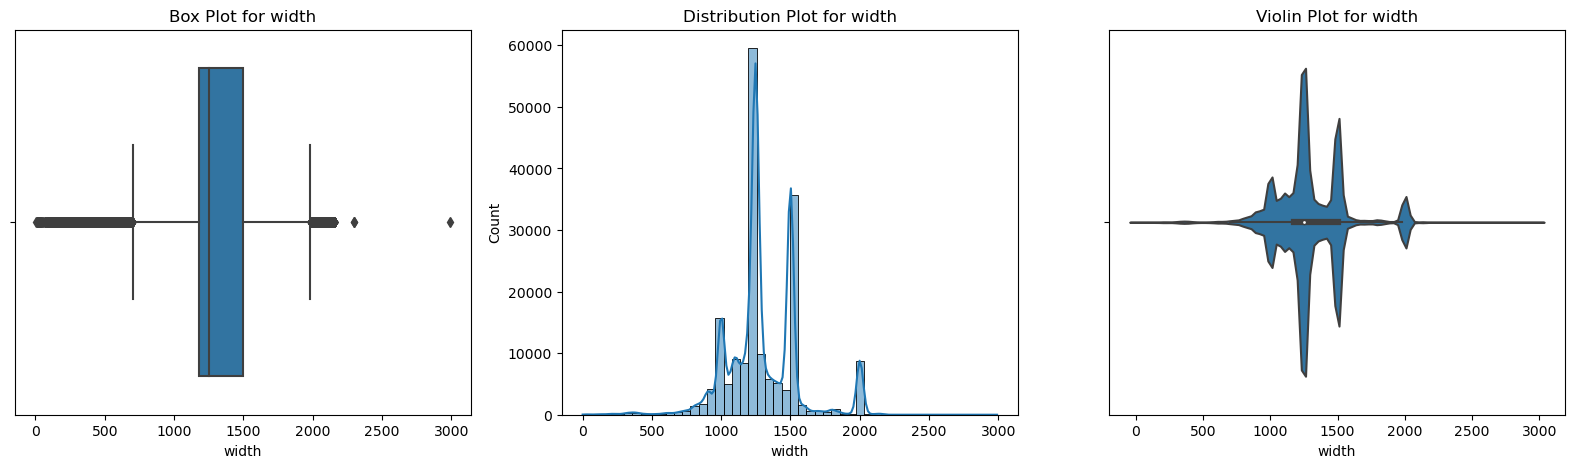

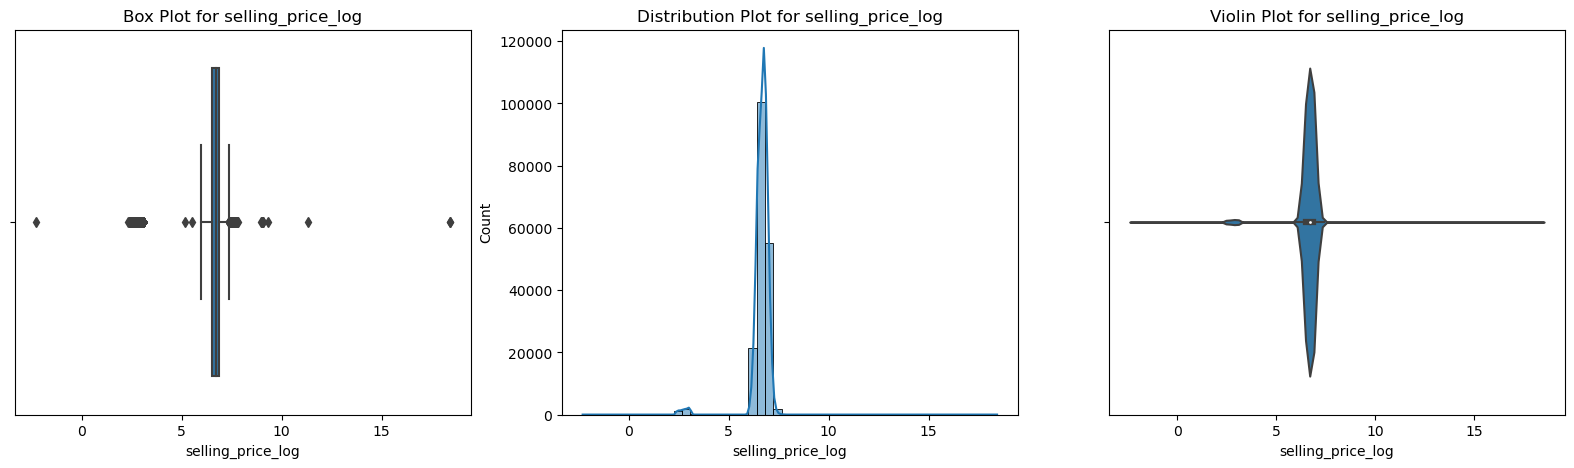

In [13]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [14]:
numerical_cols = ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']


correlation_matrix = df1[numerical_cols].corr()


print(correlation_matrix)

                   quantity tons_log  thickness_log     width  \
quantity tons_log           1.000000       0.042005  0.034431   
thickness_log               0.042005       1.000000  0.387243   
width                       0.034431       0.387243  1.000000   
selling_price_log           0.023898      -0.154999 -0.069453   

                   selling_price_log  
quantity tons_log           0.023898  
thickness_log              -0.154999  
width                      -0.069453  
selling_price_log           1.000000  


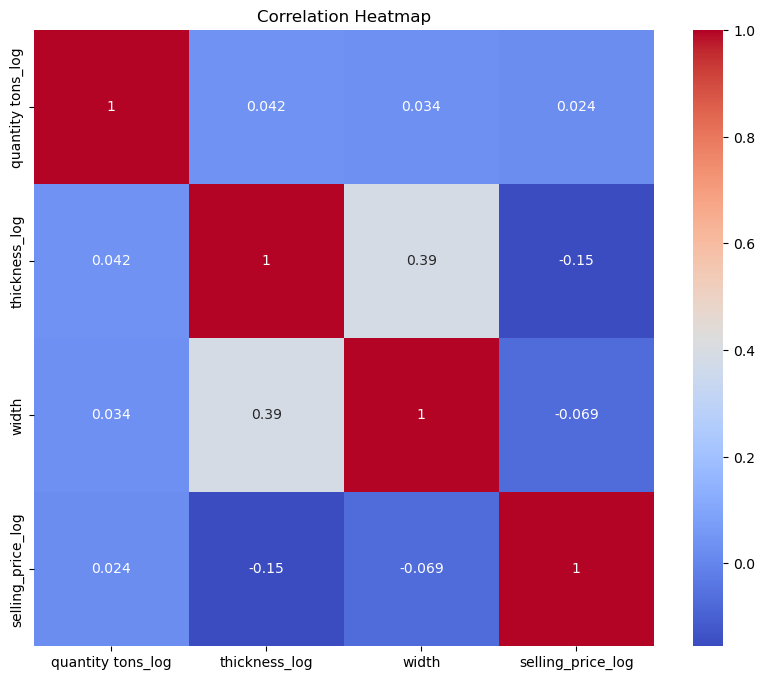

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
OE = OrdinalEncoder()
df1['status_en'] = OE.fit_transform(df1[['status']])
df1['item type_en'] = OE.fit_transform(df1[['item type']])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [17]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'thickness_log', 'selling_price_log', 'status_en', 'item type_en'],
      dtype='object')

In [18]:
item_type_mapping = pd.DataFrame({
    'item type': df1['item type'].unique(),
    'item type_en': df1['item type_en'].unique()
})

item_type_mapping

,item type,item type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [19]:
status_mapping = pd.DataFrame({
    'status': df1['status'].unique(),
    'status_en': df1['status_en'].unique()
})

status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


# Defining Features (x) and Target (y) for Model Training

In [20]:
x=df1[['quantity tons_log','status_en','item type_en','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

# Splitting Data into Training and Testing Sets

In [21]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


# Training and Evaluating Multiple Models

In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.034761275351285384
R-squared: 0.8927331501771005


In [53]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.020791558479687562
R-squared: 0.9358411059868605


In [54]:
# Split a smaller subset for tuning
x_tune, _, y_tune, _ = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

#Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3),
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,      
    scoring='r2',
    verbose=2,
    random_state=10,
    n_jobs=-1
)


random_search.fit(x_tune, y_tune)


best_params = random_search.best_params_
print("Best Parameters:", best_params)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 86}


# Retraining the Final Model and Evaluating Performance on Test Set

In [22]:

final_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=86,
    random_state=10
)

final_model.fit(x_train, y_train)


y_pred = final_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test R² Score: {r2}")
print(f"Test Mean Absolute Error (MAE): {mae}")



Test R² Score: 0.9365332741249932
Test Mean Absolute Error (MAE): 0.11111921124739252


# Predicting selling price for new sample

In [23]:

new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

new_pred = final_model.predict(new_sample)[0]


print("Selling Price:", np.exp(new_pred))

Selling Price: 573.5493727804642


# Save the model using pickle

In [24]:

with open('selling_price_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Model Performance and Feature Importance Visualization

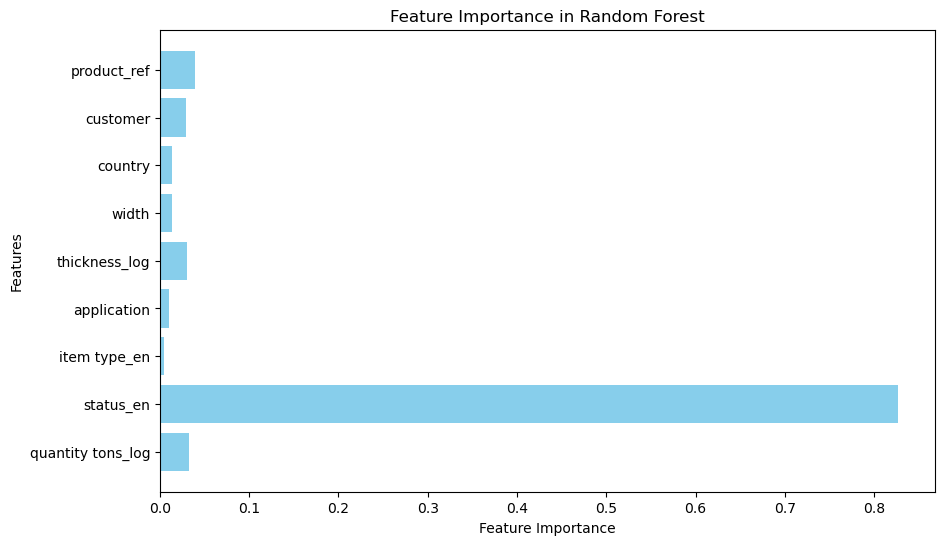

In [25]:

feature_importances = final_model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

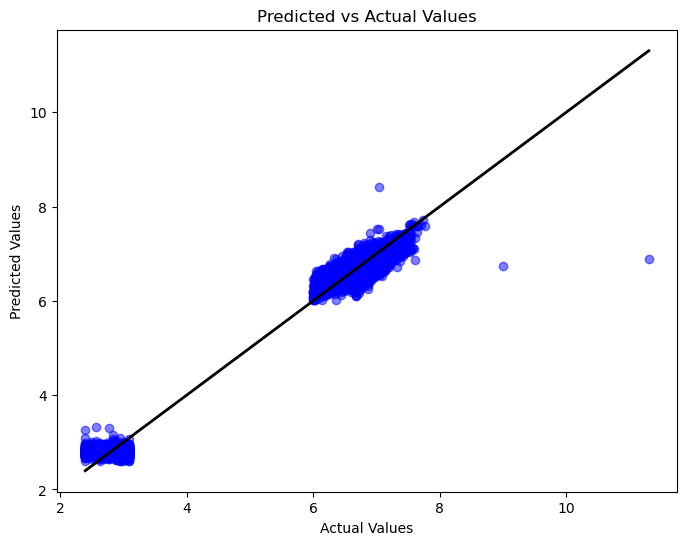

In [26]:
# Predicted vs Actual Values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_model.predict(x_test), color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Classification model for predicting status 

In [1]:
# define new dataframe 

In [27]:
df2 = df1.copy()
df2.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [28]:
df3 = df2[df2['status'].isin(['Won', 'Lost'])]
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [29]:
df3["status"].value_counts()

Won     115996
Lost     34431
Name: status, dtype: int64

In [30]:
df3["status_encoded"] = df3['status'].map({"Won":1, "Lost":0})
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en,status_encoded
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0,1
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0,1


In [31]:
df4 = df3[['quantity tons_log','selling_price_log','item type_en', 'application','thickness_log',
           'width','country','customer','product_ref','status_encoded']]
df4

,quantity tons_log,selling_price_log,item type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665,1
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,6.400257,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,164141591,1
181668,4.629691,6.381816,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591,1
181669,5.337954,6.378426,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591,1
181670,1.443523,6.428105,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591,1


In [32]:
df4["status_encoded"].value_counts()

1    115996
0     34431
Name: status_encoded, dtype: int64

# Oversampling with SMOTE and Defining Features (x) and Target (y) for Model Training

In [33]:
x = df4.drop(["status_encoded"], axis=1)
y = df4["status_encoded"]

In [34]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x,y)

In [35]:
y_res.value_counts()

1    115996
0    115996
Name: status_encoded, dtype: int64

In [36]:
y_res.shape

(231992,)

In [37]:
len(x_res)

231992

# Splitting Data into Training and Testing Sets

In [38]:

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 9)
(69598, 9)
(162394,)
(69598,)


# Training and Evaluating Multiple Models

In [71]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32598  2413]
 [ 2601 31986]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     35011
           1       0.93      0.92      0.93     34587

    accuracy                           0.93     69598
   macro avg       0.93      0.93      0.93     69598
weighted avg       0.93      0.93      0.93     69598



In [41]:
final_model1 = RandomForestClassifier()
final_model1.fit(x_train, y_train)

y_pred = final_model1.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[34053   958]
 [ 2068 32519]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     35011
           1       0.97      0.94      0.96     34587

    accuracy                           0.96     69598
   macro avg       0.96      0.96      0.96     69598
weighted avg       0.96      0.96      0.96     69598



# Predicting status for new sample

In [42]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = final_model1.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


# save the model using pickle

In [43]:

with open('status_model.pkl', 'wb') as file:
    pickle.dump(final_model1, file)

# Model Performance and Feature Importance Visualization

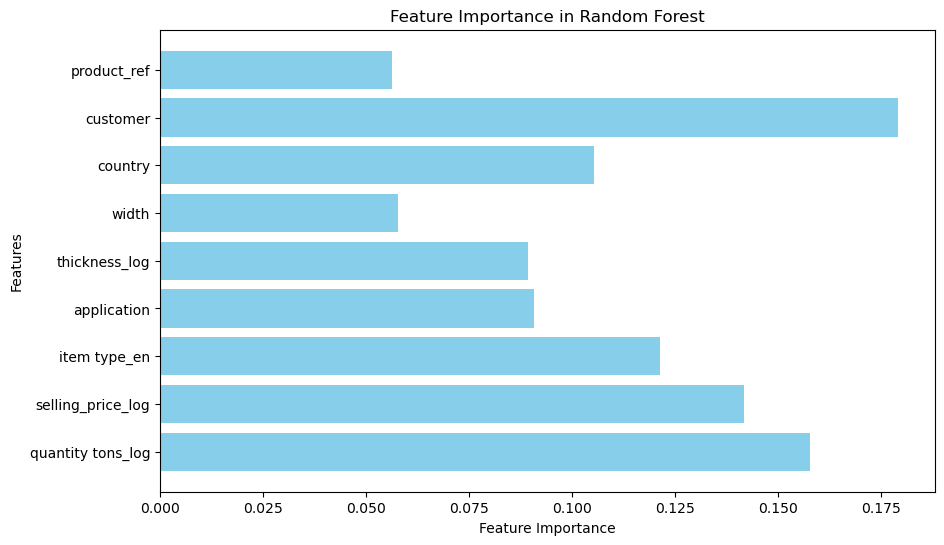

In [45]:

feature_importances = final_model1.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

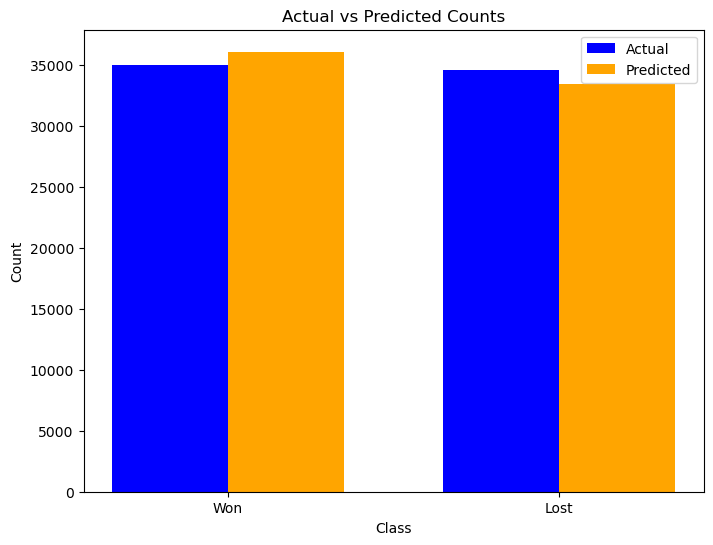

In [49]:
label_mapping = {1: 'Lost', 0: 'Won'}

actual_vs_predicted = pd.DataFrame({
    'Actual': pd.Series(y_test).map(label_mapping),  
    'Predicted': pd.Series(final_model1.predict(x_test)).map(label_mapping) 
})

counts_actual = actual_vs_predicted['Actual'].value_counts()
counts_predicted = actual_vs_predicted['Predicted'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
classes = ['Won', 'Lost'] 


ax.bar([x - bar_width / 2 for x in range(len(classes))], counts_actual[classes], bar_width, label='Actual', color='blue')
ax.bar([x + bar_width / 2 for x in range(len(classes))], counts_predicted[classes], bar_width, label='Predicted', color='orange')

ax.set_xticks(range(len(classes)))
ax.set_xticklabels(classes)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.legend()
plt.show()

